In [1]:
#from matplotlib.pyplot import * 
#from numpy import *
import pynested_fit as pynf
import os

%matplotlib inline
#%matplotlib widget
#%matplotlib notebook

In [2]:
# Define the present path
root_path = os.getcwd()
print(root_path)

/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/examples/jupyter_notebooks


In [3]:
# Choose one of them
path = root_path+'/res_1gauss_bg'
print(path)
os.chdir(path)

/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/examples/jupyter_notebooks/res_1gauss_bg


In [4]:
# Choose inputs
conf = pynf.Configurator(
    datafiles=['he-histo.dat'],
    filefmt='.tsv',
    specstr='x,c',
    livepoints=1000,
    expressions=['GAUSS_BG'],
    params={
        'b_g': {'value': 0.01,  'step': -1, 'min': 0, 'max': 0.3 ,   'npar': 1},
        'x_1': {'value': 454.6, 'step': -1, 'min': 300, 'max': 600 , 'npar': 2},
        'A_1': {'value': 300,   'step': -1, 'min': 0, 'max': 500 ,   'npar': 3},
        's':   {'value': 20,    'step': -1, 'min': 10, 'max': 30 ,   'npar': 4},
    },
    data={'xmin': 250, 'xmax': 650},
)

In [5]:
# Run the code

# For visualising the progress of the execution use this command
out = conf.sample(output_mode='live')
# If nothing shows, use simply the command (symlink to created or version to be used)
# !nested_fit

# For silently running the code and save the raw output in a dictionnary, use this command
# out = conf.sample(output_mode='none')

| N. try:  1 | N. step:        100 | Min. loglike:   -1452.182412942114070 | Evidence:   -1459.030964449155135 | Ev. step:   -1459.191838993438296 | Ev. pres. acc.:  1.1294997E+03 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:        200 | Min. loglike:   -1285.408931270100311 | Evidence:   -1293.029871055701051 | Ev. step:   -1293.737195692973728 | Ev. pres. acc.:  9.6339856E+02 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:        300 | Min. loglike:   -1203.622201518437805 | Evidence:   -1210.562721450386107 | Ev. step:   -1211.071723791942077 | Ev. pres. acc.:  8.8083141E+02 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:        400 | Min. loglike:   -1148.915481151675522 | Evidence:   -1156.043548435373395 | Ev. step:   -1156.865967481234748 | Ev. pres. acc.:  8.2621224E+02 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:        500 | Min. loglike:   -1080.152884872654568 | Evidence:   -1087.684311387402431 | Ev.

In [6]:
# Load the nested output data
# The available parameters and other variables that can be plotted are listed
an=pynf.Analysis()

Current path =  .
Available parameters : ['weight', 'lnlikelihood', 'b_g', 'x_1', 'A_1', 's']


0 max
nf_output_data_max.dat


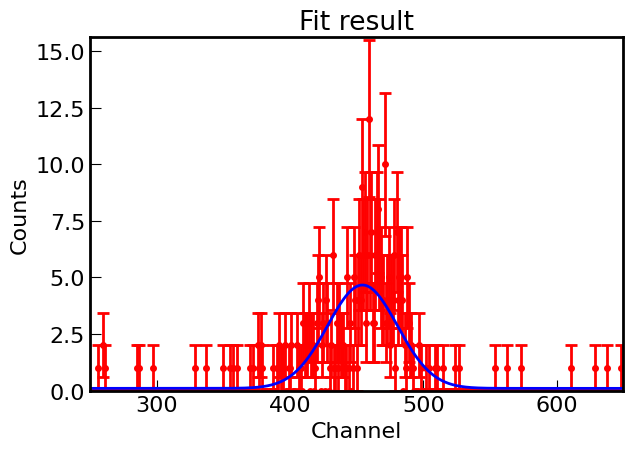

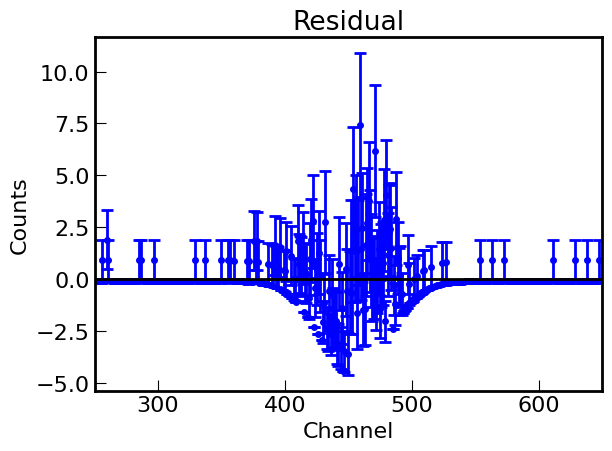

In [7]:
# Plot the data with the best fit (parameters corresponding to the maximum value of the data) and residual
# Other choices are median and mean parameters values selectable with "typeof='mean'" and "typeof='median'"
an.plot()

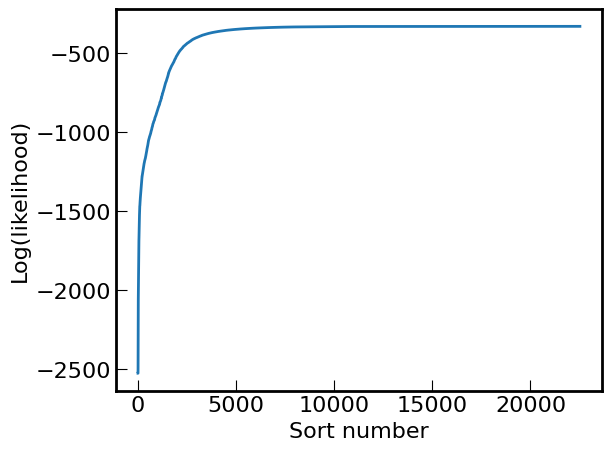

In [8]:
# Plot the likelihood sampling 
an.plot_like()

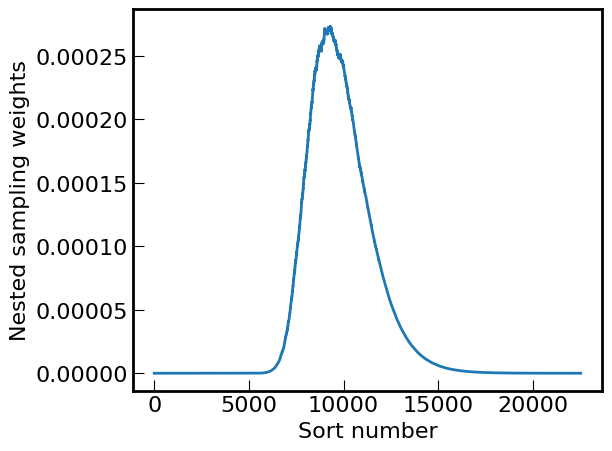

In [9]:
# Plot the weights of nested sampling corresponding to w_n = Delta X_n L_n
an.plot_weights()

Set par_number A_1 to 4


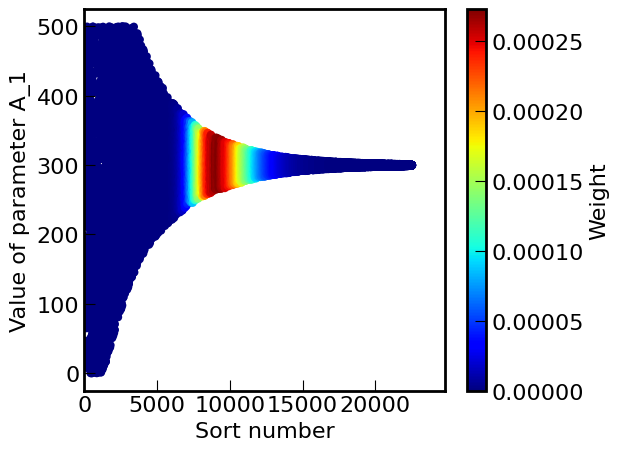

In [10]:
# Plot the parameter convergence
# Colored regions correspond to the high value of the weights
an.plot_par('A_1')

Set par_number A_1 to 4


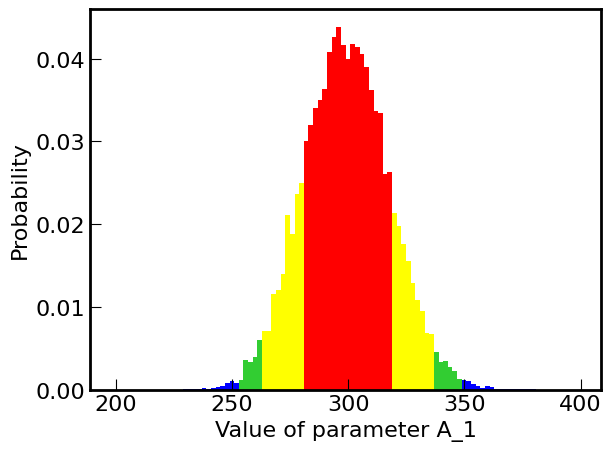

In [11]:
# Plot one parameter histogram
# Red, yellow and green region correspond to 1,2,3 sigmas
an.histo('A_1',bins=100,xmin=200,xmax=400)

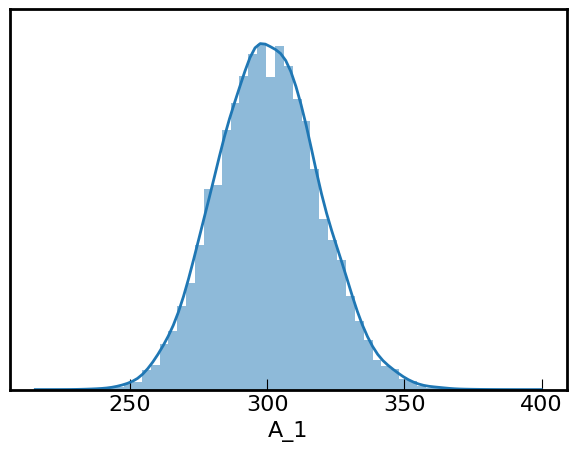

In [12]:
# Plot one parameter interpolated histogram using getdist
# Note: this is a third part function and it requires to specify the path explicitally
an.histo_interp('A_1',path=path)

Set par_number A_1 to 4
Set par_number x_1 to 3


/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1119: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data68[::-1,]),interpolation='nearest',extent=extent,aspect='auto',cmap=rvb68)
/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1120: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data95[::-1,]),interpolation='nearest',extent=extent,aspect='auto',cmap=rvb95)
/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1121: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data99[::-1,]),interpolation='nearest',extent=extent,aspect='auto',cmap=rvb99)
/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1122: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data_rest[::-1,]),interpolation='nearest',extent=extent,aspect='aut

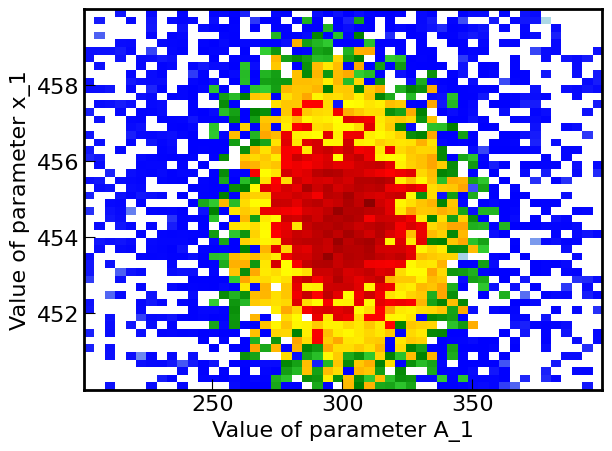

In [13]:
# Plot one parameter histogram
# Red, yellow and green region correspond to 1,2,3 sigmas
an.histo2D('A_1','x_1',bins=50,xmin=200,xmax=400,ymin=450,ymax=460)

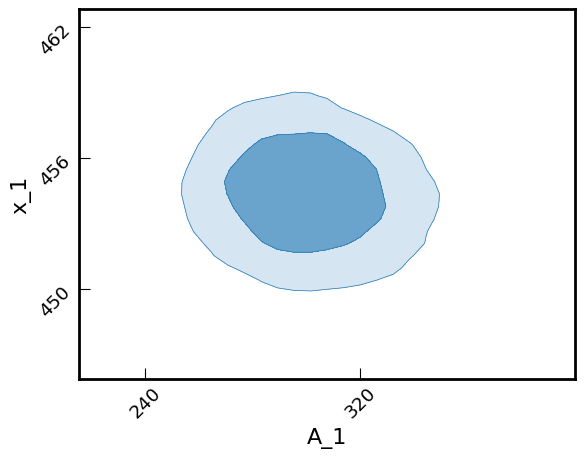

In [14]:
# Same with interpolation from getdist
# Note: this is a third part function and it requires to specify the path explicitally
an.histo2D_interp('A_1','x_1',path=path)


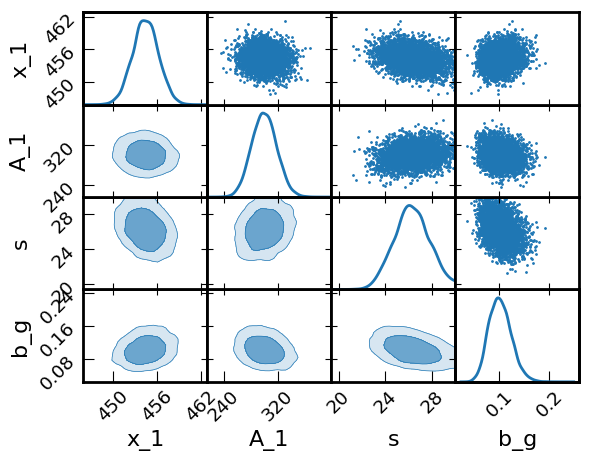

In [15]:
# Triangle plot (from anesthetic) to have a look to all parameters at the same time
an.triangle_plot(['x_1','A_1','s','b_g'])

In [16]:
# Statistics (from anesthetic) to have a good estimation of the uncertainties (expecially for the evidence)
an.stats()

logZ 	 = -338.243772 	± 0.082751
D_KL 	 = 8.003915 	± 0.076365
logL_P 	 = -330.239857 	± 0.029605
d_G 	 = 3.809323 	± 0.084436
